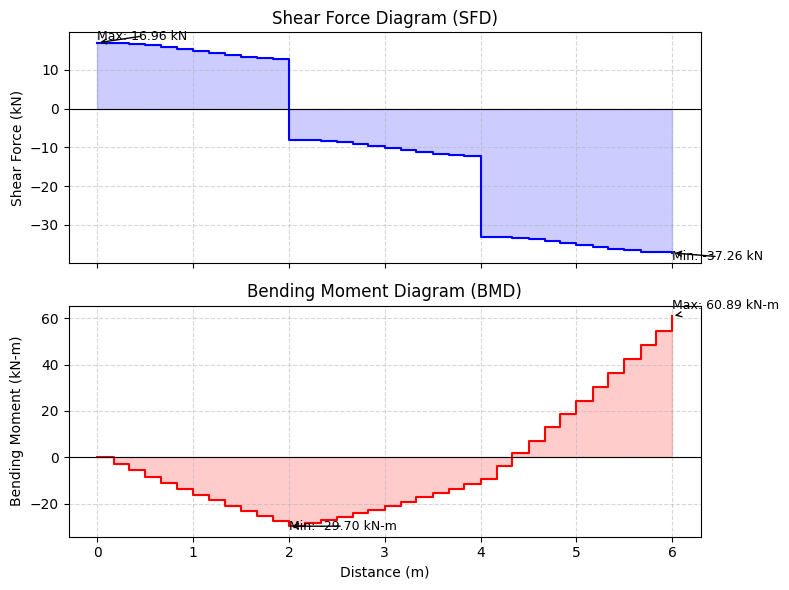

In [5]:
import csv
import matplotlib.pyplot as plt
import math

def read_sfd_bmd_from_csv(csv_file):
    
    x_vals = []
    shear_vals = []
    moment_vals = []
    
    with open(csv_file, 'r', newline='') as f:
        reader = csv.DictReader(f)
        for row in reader:
            # Convert to float as needed
            x_vals.append(float(row['Distance (m)']))
            shear_vals.append(float(row['SF (kN)']))
            moment_vals.append(float(row['BM (kN-m)']))
    
    return x_vals, shear_vals, moment_vals

def plot_sfd_bmd(x_vals, shear_vals, moment_vals):
   
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6), sharex=True)
    
    # --- 1) SFD ---
    axes[0].plot(x_vals, shear_vals, drawstyle='steps-post', color='blue', label='Shear')
    axes[0].fill_between(x_vals, shear_vals, step='post', color='blue', alpha=0.2)
    axes[0].axhline(y=0, color='k', linewidth=0.8)
    axes[0].set_ylabel('Shear Force (kN)')
    axes[0].set_title('Shear Force Diagram (SFD)')
    axes[0].grid(True, linestyle='--', alpha=0.5)
    
    # Annotate max & min shear
    max_shear = max(shear_vals)
    min_shear = min(shear_vals)
    max_shear_x = x_vals[shear_vals.index(max_shear)]
    min_shear_x = x_vals[shear_vals.index(min_shear)]
    
    axes[0].annotate(f"Max: {max_shear:.2f} kN",
                     xy=(max_shear_x, max_shear),
                     xytext=(max_shear_x, max_shear + 0.05*max_shear),
                     arrowprops=dict(arrowstyle="->"),
                     fontsize=9)
    
    axes[0].annotate(f"Min: {min_shear:.2f} kN",
                     xy=(min_shear_x, min_shear),
                     xytext=(min_shear_x, min_shear - 0.05*abs(min_shear)),
                     arrowprops=dict(arrowstyle="->"),
                     fontsize=9)

    # --- 2) BMD ---
    axes[1].plot(x_vals, moment_vals, drawstyle='steps-post', color='red', label='Moment')
    axes[1].fill_between(x_vals, moment_vals, step='post', color='red', alpha=0.2)
    axes[1].axhline(y=0, color='k', linewidth=0.8)
    axes[1].set_ylabel('Bending Moment (kN-m)')
    axes[1].set_title('Bending Moment Diagram (BMD)')
    axes[1].set_xlabel('Distance (m)')
    axes[1].grid(True, linestyle='--', alpha=0.5)
    
    # Annotate max & min moment
    max_moment = max(moment_vals)
    min_moment = min(moment_vals)
    max_moment_x = x_vals[moment_vals.index(max_moment)]
    min_moment_x = x_vals[moment_vals.index(min_moment)]
    
    axes[1].annotate(f"Max: {max_moment:.2f} kN-m",
                     xy=(max_moment_x, max_moment),
                     xytext=(max_moment_x, max_moment + 0.05*max_moment),
                     arrowprops=dict(arrowstyle="->"),
                     fontsize=9)
    
    axes[1].annotate(f"Min: {min_moment:.2f} kN-m",
                     xy=(min_moment_x, min_moment),
                     xytext=(min_moment_x, min_moment - 0.05*abs(min_moment)),
                     arrowprops=dict(arrowstyle="->"),
                     fontsize=9)

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    csv_file = "SFS_Screening_SFDBMD.csv"  # <-- Replace with your actual CSV filename
    x_vals, shear_vals, moment_vals = read_sfd_bmd_from_csv(csv_file)
    
    plot_sfd_bmd(x_vals, shear_vals, moment_vals)
